<a href="https://colab.research.google.com/github/spandangupta/Data602-Data-Analysis-Machine-Learning-Practice/blob/master/LinearRegressionandRidge_BostonHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.utils import shuffle

In [ ]:
data = datasets.load_boston()

In [ ]:
data

In [ ]:
print(data.DESCR)

In [ ]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [ ]:
housing_df.head()

In [ ]:
housing_df.describe()

In [ ]:
housing_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [ ]:
housing_df.head()

In [ ]:
housing_df.describe()

In [ ]:
housing_df.plot.box()

In [ ]:
housing_df[['RM']].plot.box()

In [ ]:
housing_df.plot.scatter(x='LSTAT',y='target')
housing_df.plot.scatter(x='AGE',y='target')


In [ ]:
train_df = housing_df.iloc[0:303]
test_df = housing_df.iloc[304:404]
val_df = housing_df.iloc[405:505]

In [ ]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [ ]:
lr.normalize=True
lr.fit(X,y)

In [ ]:
print(lr.predict([X.iloc[505]]))
print(np.dot(lr.coef_,X.iloc[505])+lr.intercept_)
print(y.iloc[505])

[23.11123204]
23.11123203536838
21.0


In [ ]:
lr.score(X,y)

0.7406077428649427

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,lr.predict(X))

21.897779217687496

In [ ]:
lr.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [ ]:
print(housing_df.columns[lr.coef_.argmin()])
print(housing_df.columns[lr.coef_.argmax()])

NOX
RM


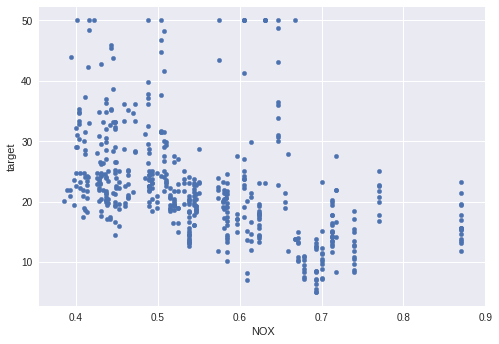

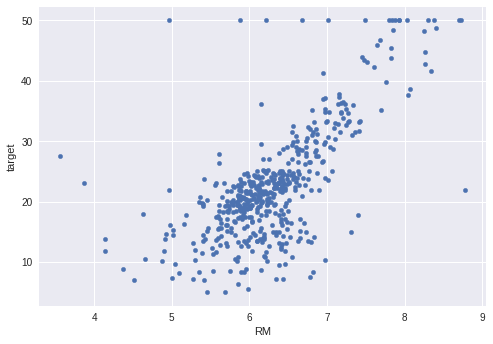

In [ ]:
housing_df.plot.scatter(x='NOX',y='target')
housing_df.plot.scatter(x='RM',y='target')

In [ ]:
lrr = Ridge()

In [ ]:
lrr.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
lrr.coef_

array([-1.03621516e-01,  4.74143761e-02, -8.54660332e-03,  2.55422124e+00,
       -1.07934364e+01,  3.84925574e+00, -5.36782076e-03, -1.37257042e+00,
        2.89649799e-01, -1.29071544e-02, -8.76632534e-01,  9.75351853e-03,
       -5.34072106e-01])

In [ ]:
print(lrr.predict([X.iloc[503]]))
print(np.dot(lrr.coef_,X.iloc[503])+lrr.intercept_)
print(y.iloc[503])

[19.38688287]
19.386882869964708
12.5
